In [1]:
import csv
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

C:\Users\KNatarajan\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


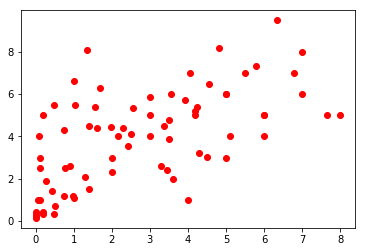

In [2]:
data = list(csv.reader(open("LR.csv")))
npdata = np.array(data)
floatdata = npdata.astype(np.float)
train_x = tf.constant(floatdata[:, 0])
train_y = tf.constant(floatdata[:, 1])

with tf.Session() as sess:
#    print(sess.run([train_x, train_y]))
    plt.plot(train_x.eval(), train_y.eval(), "ro", label = "data")
    plt.show()


In [ ]:
#Regression: y = wx + b
#define w and b
w = tf.Variable(0.45, name = "weight")
b = tf.Variable(1.0, name = "bias")

#define parameters
n_samples = len(floatdata[:,0])
learning_rate = 0.0001
epochs = 1000
display_epoch = 100


X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

pred = tf.add(tf.multiply(w, X), b)
cost = tf.reduce_sum(tf.pow(Y - pred, 2.0)) * 1.0/(2 * n_samples) #Mean error E = (1/2n) summation(td - od)**2
opt = tf.train.MomentumOptimizer(momentum = 0.1, learning_rate = learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    xx = sess.run(train_x)
    yy = sess.run(train_y)
    sess.run(init)
    
    #start training
    for i in range(epochs):
        count = 0
        while count < n_samples:
            sess.run(opt, feed_dict = { X: xx[count], Y: yy[count]})
            count += 1
            
        if i % display_epoch == 0:
            print("Epoch: ",i, "Weight:", w.eval(), "bias:", b.eval(), "cost", cost.eval(feed_dict = {X:xx, Y:yy}))
            
    print("Optimization done.")
    print("Epoch: ",i, "Weight:", w.eval(), "bias:", b.eval(), "cost", cost.eval(feed_dict = {X:xx, Y:yy}))
    
    plotx = np.linspace(0, 12)
    ploty = w * plotx + b
    plt.plot(train_x.eval(), train_y.eval(), "ro", label = "data")
    plt.plot(plotx, ploty.eval())
    plt.show()

Epoch:  0 Weight: 0.45061556 bias: 1.0001885 cost 3.100423
Epoch:  100 Weight: 0.5078479 bias: 1.0180576 cost 2.776318
